In [15]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.preprocessing import scale 
from sklearn.linear_model import lasso_path
from sklearn.linear_model import orthogonal_mp as sklearn_orthogonal_mp

from itertools import cycle

import matplotlib.pyplot as plt

In [2]:
X = pd.read_csv("X.txt", delimiter=" ", header=None)

In [3]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,1.980177,0.628058,0.288046,-1.671945,-0.085840,-0.163211,0.108807,-0.435453,0.147730,-0.285670,...,2.088449,-1.014255,-0.423560,-0.870608,-0.921233,-1.447748,0.554352,-0.967488,1.694810,1.099867
1,-1.722960,-1.723460,-1.305635,0.706715,-1.542858,-2.186801,-0.742675,-0.319861,-1.350508,0.926180,...,-0.439705,-0.197959,0.314291,-2.054907,0.072413,-1.934991,0.935861,0.750241,-0.191711,-1.499949
2,1.172566,-0.235771,-0.385216,0.084084,-2.207806,-0.066960,0.500649,-0.156459,-0.350201,-1.449118,...,-1.243935,0.869907,-1.293595,-0.406142,-0.754354,-0.442438,0.600910,-1.034253,-1.905852,0.956277
3,0.490787,0.993502,0.248395,1.045396,1.532511,1.634100,-0.005681,-0.084379,0.662641,0.474945,...,1.488665,-1.743821,-1.236939,0.117837,0.295043,-1.336598,-0.406536,-0.187841,-0.229590,-0.250259
4,-1.277386,-0.307068,-0.450868,-0.598372,-0.915832,-1.907487,-1.674766,-0.498261,-1.076544,-0.391446,...,-2.332443,-1.012189,-1.621601,-0.592864,-1.912750,0.160692,-0.386495,-1.646662,-2.829093,-2.327198


In [4]:
X.shape

(50, 300)

In [5]:
y = pd.read_csv("y.txt", delimiter=" ", header=None)

In [6]:
y.head()

,0
0,-0.759361
1,-2.101183
2,-0.896895
3,1.374790
4,-0.711535


In [7]:
N=100
alphas = np.geomspace(0.001, 2, N)

In [8]:
lasso =  Lasso(alpha=1.47e-2, fit_intercept=False)
lasso.fit(X,y)
#print(lasso.coef_)

Lasso(alpha=0.0147, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [9]:
coefs = []
for a in alphas:
    lasso =  Lasso(alpha=a, normalize = False, fit_intercept=False)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)
    #print(lasso.coef_)

In [13]:
alpha_array = alphas[:10]

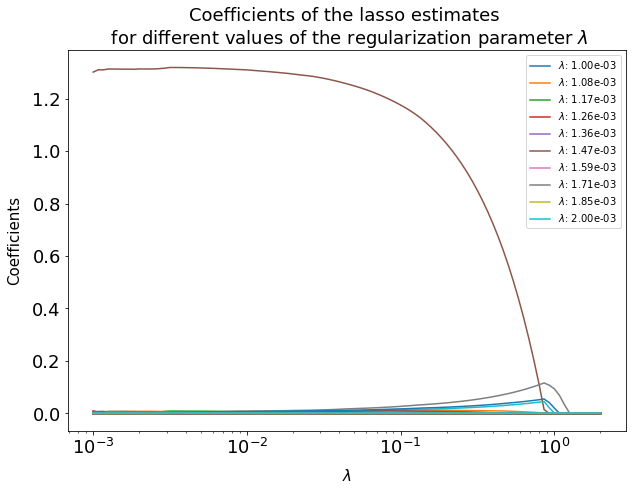

In [14]:
plt.figure(figsize=(10, 7))
plt.semilogx(alphas, coefs)
#plt.semilogx(lambdas[1], coefs[1], label = "lambda 1")
plt.title(f"Coefficients of the lasso estimates \n for different values of the regularization parameter $\lambda$", fontsize=18)
plt.ylabel("Coefficients", fontsize=15, labelpad=10)
plt.xlabel(r"$\lambda$", fontsize=15, labelpad=10)
plt.legend(['$\lambda$: '+'{:.2e}'.format(i) for i in alpha_array])
#plt.legend(fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.axis('tight')
#plt.savefig("lasso.pdf", bbox_inches='tight')
plt.show()
plt.close()

In [17]:
alphas, coef_path, _ = lasso_path(X, y, alphas=alphas)

In [20]:
coef, n_iter = sklearn_orthogonal_mp(X, y, n_nonzero_coefs= 1, tol=1e-4, return_n_iter=True)

In [21]:
coef[np.nonzero(coef)]

array([ 5.55140921e-03,  8.87337569e-03, -1.03234421e-03,  1.34267980e+00,
        1.22043505e-03,  1.08038599e-03,  4.44806107e-03,  6.67717407e-03,
        1.63440733e-03,  9.11582313e-03, -4.01817454e-03,  5.49327931e-03,
        3.84181781e-03,  2.69420428e-03,  6.39530861e-03,  4.02215824e-03,
        3.65802606e-03, -2.59477902e-03,  7.22508686e-03, -4.17866922e-03,
        8.21426568e-03,  3.92431356e-03,  3.31430741e-03,  1.94975924e-03,
        5.57322861e-03,  7.08666549e-03,  1.23227633e-03,  8.10551570e-03,
       -1.22712344e-03])

In [22]:
coef.shape

(300,)

In [56]:
def orthogonal_mp(X:np.ndarray, y:np.ndarray, n_nonzero_coefs,  eps_min: np.float64 = 1e-3,
                     iter_max: int = 1000):

    def stopping_condition(coef, n_nonzero_coefs):
        
        for i in range(len(coef)):
            if coef[i].shape[0] == n_nonzero_coefs:
                return True
        return False
        
    col_idx = list()
    coefs = list()
    residual = y   
    
    for _ in range(iter_max):
        i = np.abs(np.dot(X.T, residual)).argmax()
        if i not in col_idx:
            col_idx.append(i)
        
        coefi, _, _, _ = np.linalg.lstsq(X[:, col_idx], y)
        coefs.append(coefi)
        residual = y - (X[:,col_idx] @ coefi)
        #print(residual.T @ X[:,i])
        
        if stopping_condition(coefs, n_nonzero_coefs):
            print(f"Found required number of non-zero coefficients:{n_nonzero_coefs}")
            break
            
        #print(np.inner(residual, residual))
        if np.linalg.norm(residual) <= eps_min:
            print(f"Residual too small, less than {eps_min}")
            break
            
    return coefs, col_idx

In [57]:
coef, idx = orthogonal_mp(X.values,y.values,2)

(50, 1) (1, 1)
[-7.10542736e-15]
(50, 2) (2, 1)
[2.17603713e-14]
Found required number of non-zero coefficients:2


/Users/yg/anaconda3/envs/mathds/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [58]:
coef

[array([[0.52850665]]), array([[0.33641899],
        [0.51962402]])]

In [59]:
idx

[117, 239]

In [60]:
coef[-1]

array([[0.33641899],
       [0.51962402]])